# AD-Click-Prediction
----------------------------------------------------------------------------------------------------------------

## 1. Importing Libraries

In [98]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

matplotlib.rcParams['figure.dpi'] = 120 #resolution
matplotlib.rcParams['figure.figsize'] = (8,6) #figure size
sns.set_style('darkgrid')
color = sns.color_palette()

#Display all the columns ofthe dataframe
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

#to ignore the warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Importing Data

In [5]:
root = '/Users/mac/Desktop/DataScience/Pojects_ds/Ad-Click-Prediction/'

df = pd.read_csv(root+'advertising.csv')

In [6]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


## 3. Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


#### Checking for duplicated values

In [8]:
df.duplicated().sum()

0

- There are no duplicate values.

In [10]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


#### Observations
- Interesting facts we can see from this table is that there are varied people who are engaging in the site. Like if we see the income feature, we can see that smallest income is dollar 13,996 and the highest is dollar 79,484. This means people are from different social groups. Also we are analyzing a popular website since the timeuser spend on the website in an average is 65 minutes and min time spent by them is 32 min and max time is 91 min in one seassion. These are huge numbers.
- Also, the average age of a visitor is 36 years. We see that the youngest user has 19 and the oldest is 61 years old. We can conclude that the site is targetting adult users. Finally, if we are wondering whether the site is visited more by men or women, we can see that the situation is almost equal (52% in favor of women).

##### What age group does the dataset majorly consist of?

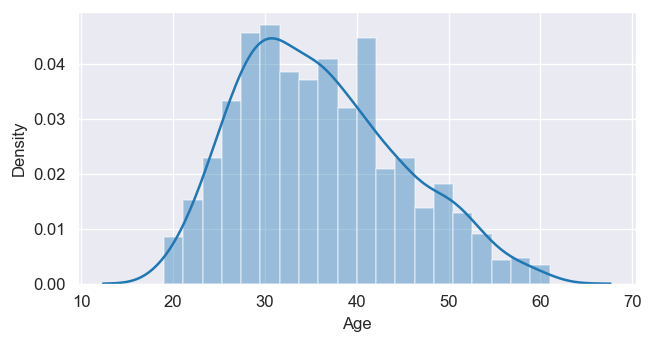

In [18]:
plt.subplots(figsize=(6,3))
sns.distplot(df['Age'],bins = 20, kde=True)
plt.show()

In [20]:
df['Age'].skew()

0.4791416884125751

#### Observations
- Most of the customers are between 26-42 age.
- This age feature is almost normal distribution.

#### What is the income distribution in different age groups?

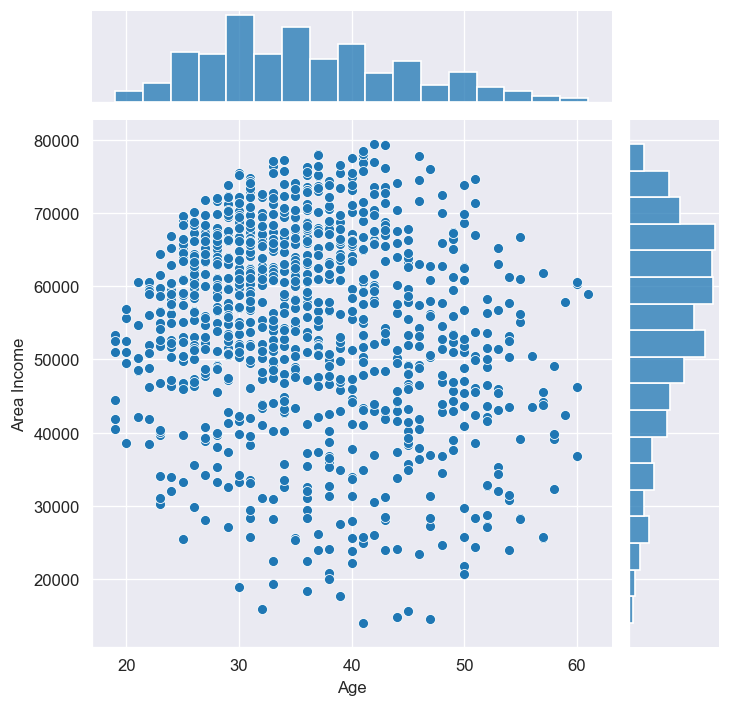

In [24]:
sns.jointplot(x='Age',y='Area Income',data=df,);

##### Observations
- Here, we can see that mostly teenagers are higher earners with age group of 20-40 earning 50k-70k.

#### Is there relation of age and the time they spent on website ?

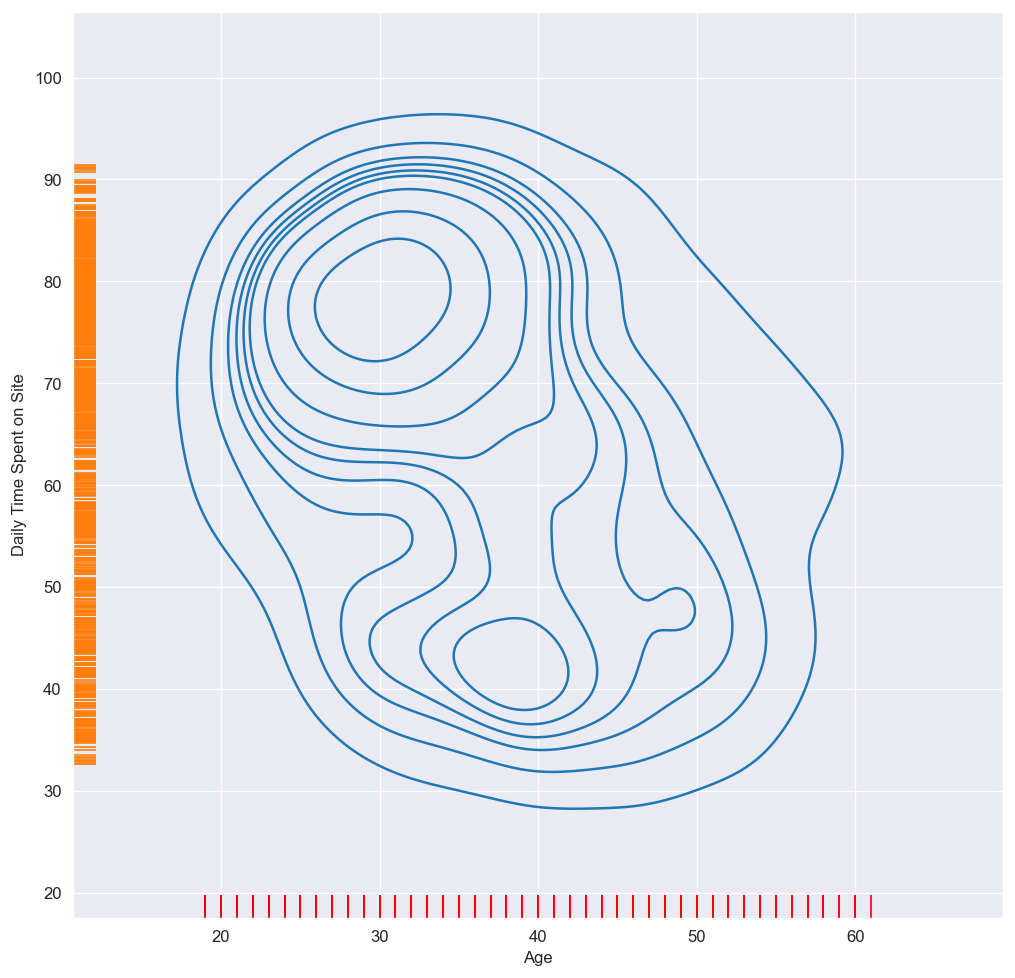

In [31]:
f,ax = plt.subplots(figsize=(10,10))
sns.kdeplot(df['Age'],df['Daily Time Spent on Site'],ax=ax)
sns.rugplot(df['Age'],color='r',ax=ax)
sns.rugplot(df['Daily Time Spent on Site'],vertical=True,ax=ax)
plt.show()

#### Observation:
- From the graph, we can conclude that younger users spend more time on the site. This implies that users of the age between 20 and 40 years can be the main target group for the marketing campaign. Hypothetically, if we have a product intended for middle-aged people, this is the right site for advertising. Conversely, if we have a product intended for people over the age of 60, it would be a mistake to advertise on this site.

#### Max users are from whihc country and how much time they spend.

In [84]:
df['Country'].nunique()

237

In [41]:
cont = df.groupby('Country')['Age'].count().reset_index().sort_values('Age',ascending=False)
cont.rename(columns = {'Age':'Count'}, inplace = True)
cont.head(10)

,Country,Count
70,France,9
54,Czech Republic,9
0,Afghanistan,8
12,Australia,8
216,Turkey,8
195,South Africa,8
187,Senegal,8
165,Peru,8
137,Micronesia,8
80,Greece,8


In [87]:
city = df.groupby('City')['Age'].count().reset_index().sort_values('Age',ascending=False)
city.rename(columns = {'Age':'Count'}, inplace = True)
city.head(10)

,City,Count
426,Lisamouth,3
955,Williamsport,3
306,Johnstad,2
528,New Sheila,2
30,Benjaminchester,2
463,Millerbury,2
462,Michelleside,2
935,West Steven,2
390,Lake Jose,2
932,West Shannon,2


#### Observations:
- Max amount of traffic is coming from France and Czech Republic.
- We have already seen, there are 237 different unique countries in our dataset and no single country is too dominant. A large number of unique elements will not allow a machine learning model to establish easily valuable relationships. For that reason, this variable will be excluded too.Same is the case with city.

In [46]:
df.groupby('Country')['Daily Time Spent on Site','Clicked on Ad'].mean().reset_index().sort_values('Daily Time Spent on Site',ascending=False)

,Country,Daily Time Spent on Site,Clicked on Ad
117,Lesotho,89.800000,0.000000
172,Reunion,88.150000,0.000000
192,Slovakia (Slovak Republic),86.915000,0.000000
79,Gibraltar,86.443333,0.000000
11,Aruba,86.410000,0.000000
198,Sri Lanka,82.450000,0.000000
148,Nepal,82.153333,0.000000
77,Germany,82.120000,1.000000
38,Cape Verde,81.750000,0.000000
127,Malaysia,81.496667,0.000000


#### Observations:
- The max traffic is coming from France and Czech Republic, but the average time spent by each users in country Lesotho,Reunion, Slovakia (Slovak Republic),Gibraltar,Aruba is more. Hence we need to analyze those customers and then target htose type of customers more.

In [53]:
df.groupby(['Clicked on Ad'])['Daily Time Spent on Site', 'Age', 'Area Income', 
                            'Daily Internet Usage'].mean()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
Clicked on Ad,,,,
0,76.85462,31.684,61385.58642,214.51374
1,53.14578,40.334,48614.41374,145.48646


#### Observations:
- Female spend more time on an average on the website.

#### What is the relationship between different features?

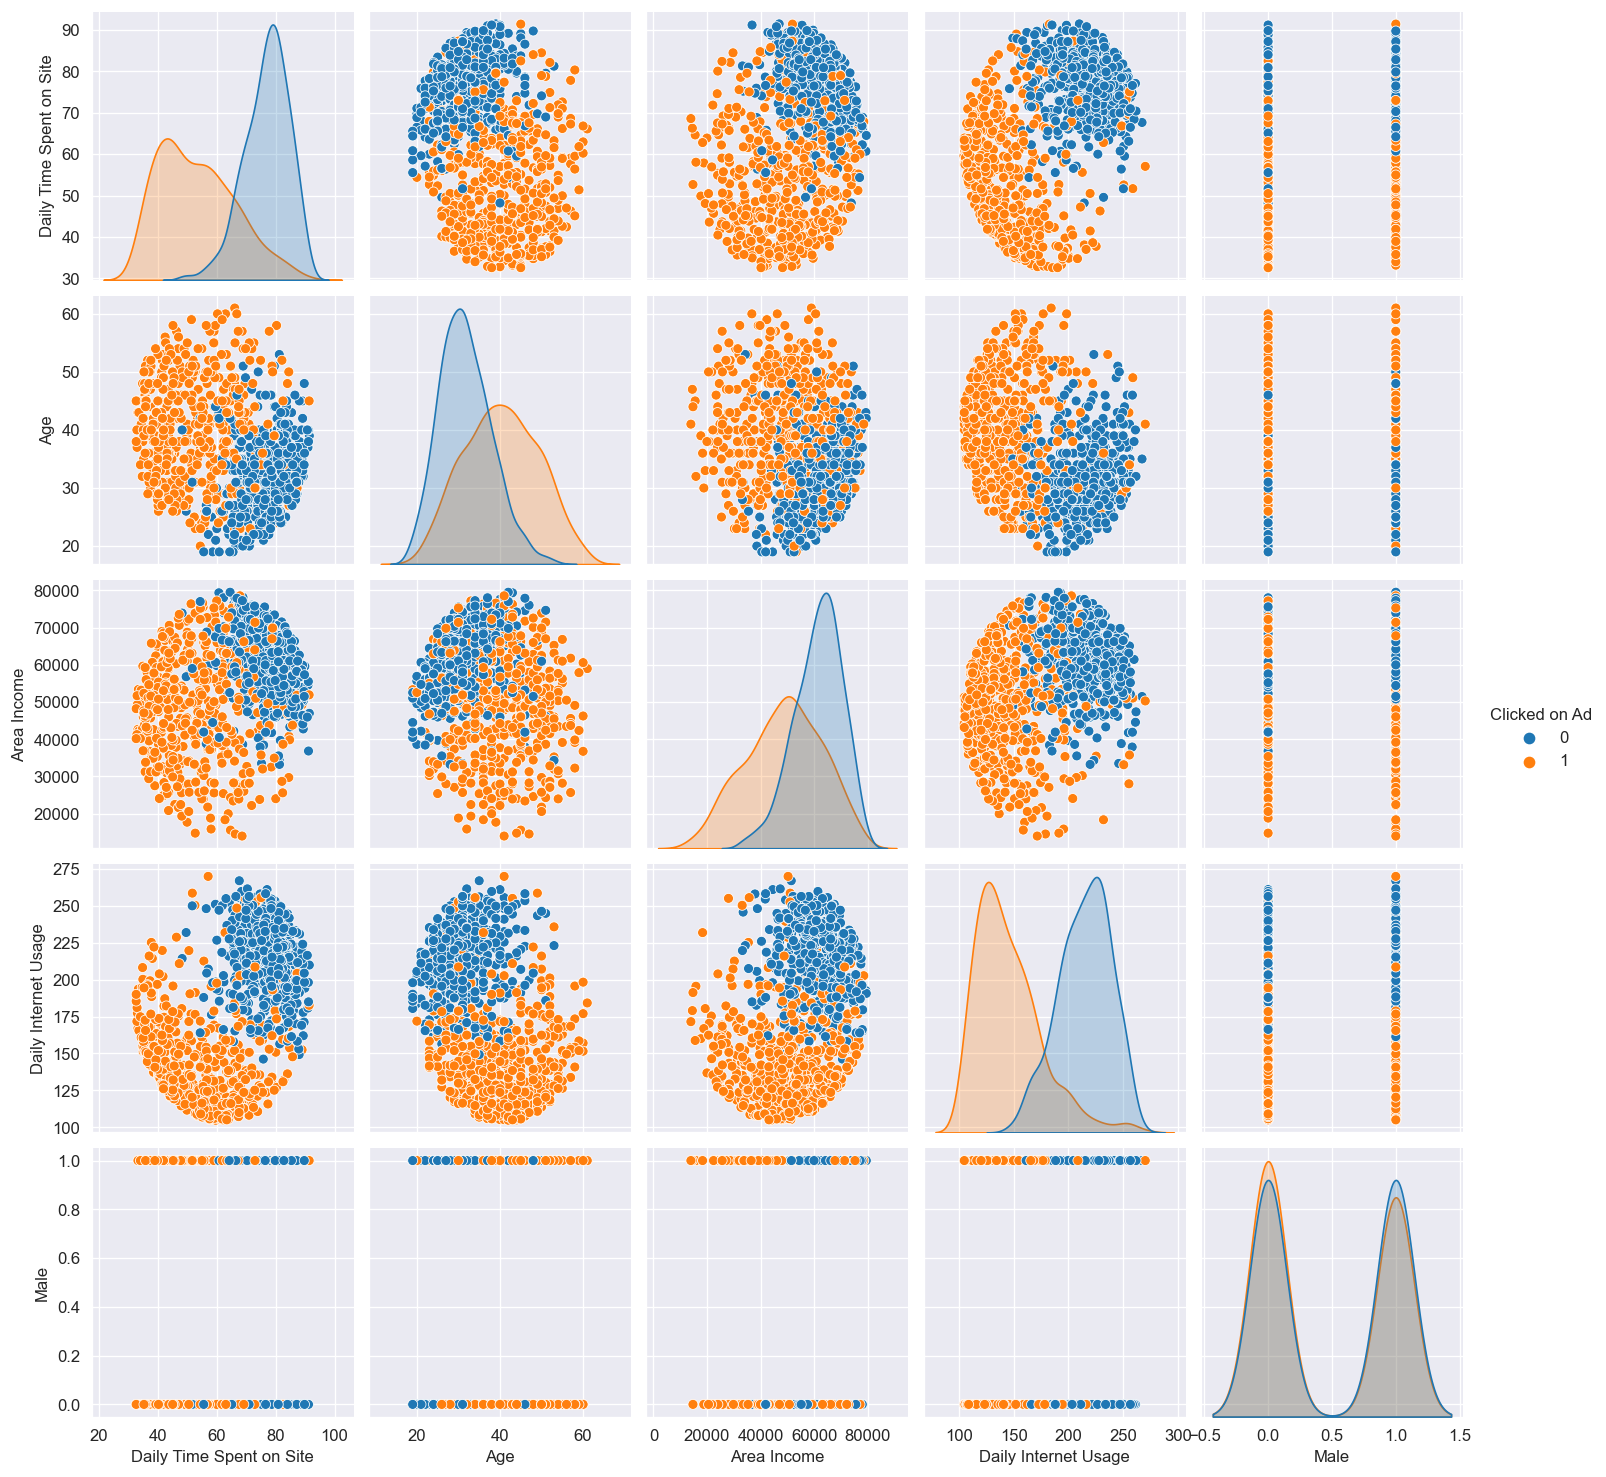

In [56]:
sns.pairplot(df,hue='Clicked on Ad')
plt.show()

#### Knowing the correlation of different features with Clicked on Ad

<AxesSubplot:>

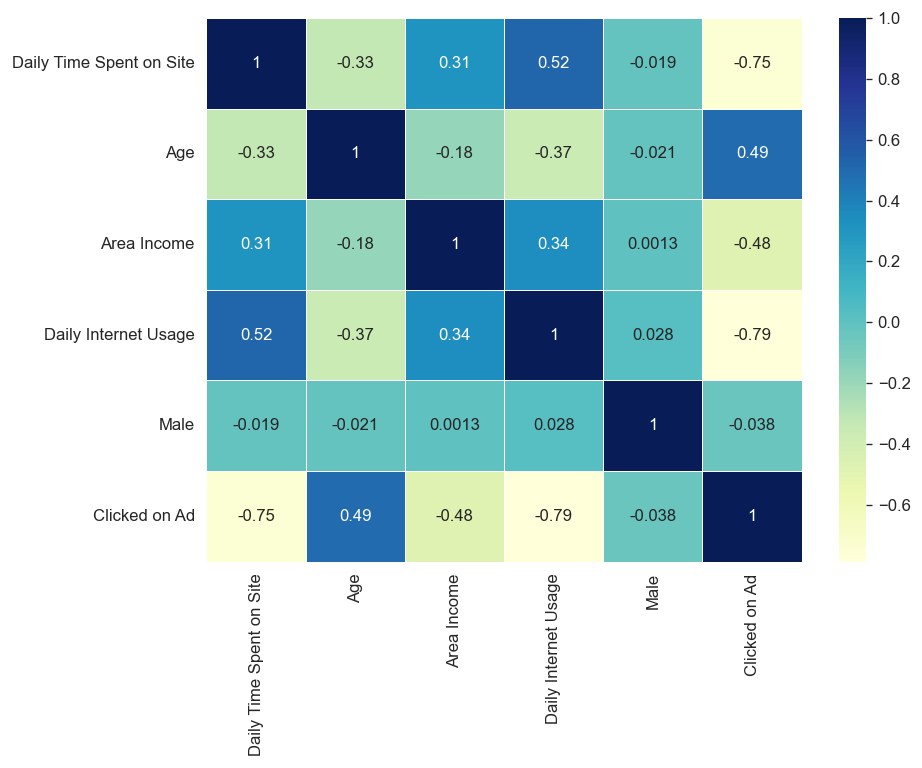

In [61]:
sns.heatmap(df.corr(),annot=True,linewidths=0.5,cmap="YlGnBu")

#### Observations:
- We can see that there is a positive correatin of Clicked on Ads and age i.e when age increases Clicked on Ads also increases. This means old people click on ads more.
- We can see that there is negative correlation between Clicked on Ads and features like- Daily Time Spent on Site,Area Income,Daily Internet Usage.
- There is no relation of Clicked on Ads and Gender.

#### time

In [63]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Month'] = df['Timestamp'].dt.month
df['Day of the month'] = df['Timestamp'].dt.day
df["Day of the week"] = df['Timestamp'].dt.dayofweek
df['Hour'] = df['Timestamp'].dt.hour
df = df.drop(['Timestamp'], axis=1)

df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Month,Day of the month,Day of the week,Hour
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,3,27,6,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,4,0,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,3,13,6,20
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,1,10,6,2
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,6,3,4,3


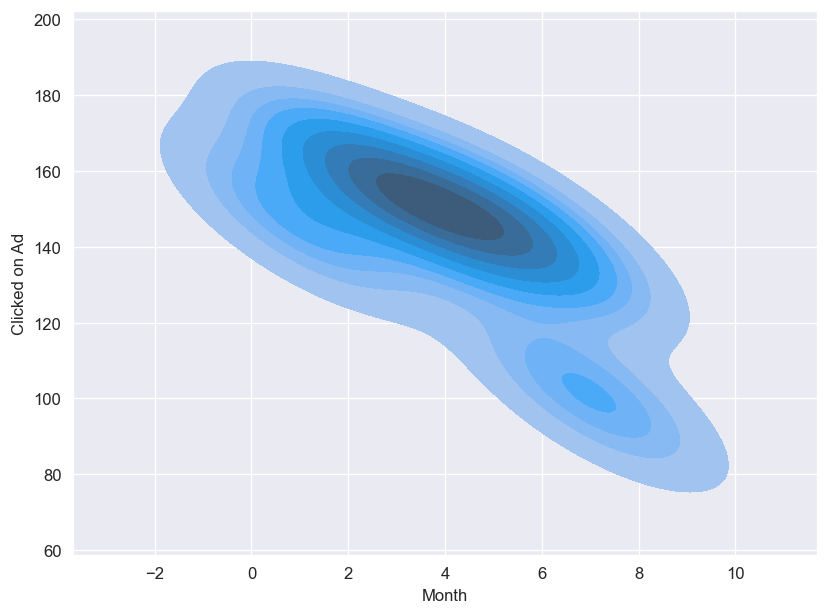

In [83]:
month = df.groupby('Month')['Clicked on Ad'].count().reset_index()
sns.kdeplot(x='Month',y='Clicked on Ad',data=month,shade=True);

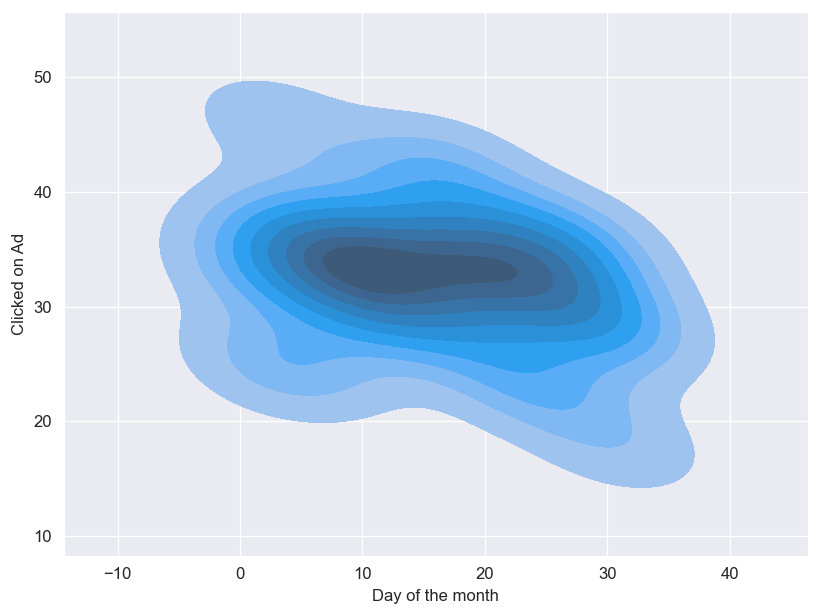

In [82]:
day_month = df.groupby('Day of the month')['Clicked on Ad'].count().reset_index()
sns.kdeplot(x='Day of the month',y='Clicked on Ad',data=day_month,shade=True);

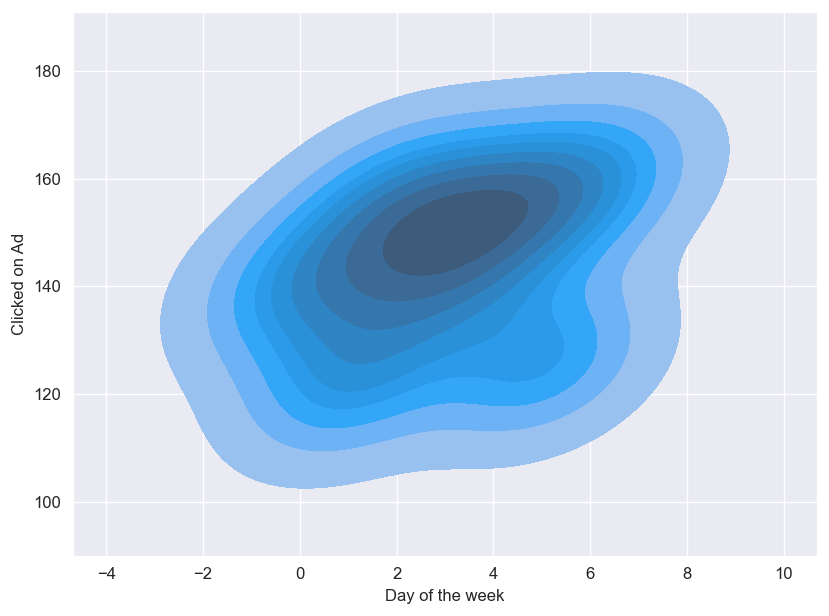

In [81]:
day_week = df.groupby('Day of the week')['Clicked on Ad'].count().reset_index()
sns.kdeplot(x='Day of the week',y='Clicked on Ad',data=day_week,shade=True);

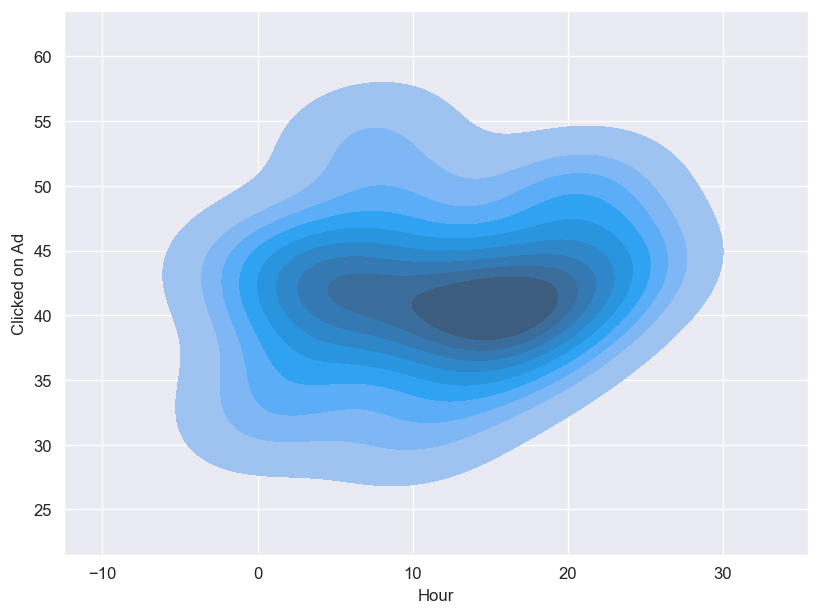

In [80]:
hour = df.groupby('Hour')['Clicked on Ad'].count().reset_index()
sns.kdeplot(x='Hour',y='Clicked on Ad',data=hour,shade=True);

## 4. Data Preprocessing

In [86]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Month,Day of the month,Day of the week,Hour
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,3,27,6,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,4,0,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,3,13,6,20
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,1,10,6,2
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,6,3,4,3


In [88]:
df = df.drop(['Ad Topic Line', 'City', 'Country'], axis=1)

In [89]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Day of the month,Day of the week,Hour
0,68.95,35,61833.90,256.09,0,0,3,27,6,0
1,80.23,31,68441.85,193.77,1,0,4,4,0,1
2,69.47,26,59785.94,236.50,0,0,3,13,6,20
3,74.15,29,54806.18,245.89,1,0,1,10,6,2
4,68.37,35,73889.99,225.58,0,0,6,3,4,3


## 5. Model Development

In [121]:
X = df.drop('Clicked on Ad',axis=1)
y = df['Clicked on Ad']

In [122]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

### Logistic Regression

In [108]:
lr_clf = LogisticRegression()

parameters = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
lr_model = GridSearchCV(estimator=lr_clf,param_grid=parameters,cv=5,scoring='accuracy')
lr_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [110]:
print('Best Parameter is:',lr_model.best_params_)
print('Accuracy:',lr_model.best_score_)

Best Parameter is: {'solver': 'newton-cg'}
Accuracy: 0.9701492537313434


### Naive Bayes

In [130]:
nb_clf = GaussianNB()
nb_clf.fit(X_train,y_train)
nb_pred = nb_clf.predict(X_test).reshape(-1,1)
nav_bayes_accuracy = accuracy_score(y_test,nb_pred)
print('Accuracy:',nav_bayes_accuracy*100)

Accuracy: 95.75757575757575


### Random Forest

In [132]:
rf_clf = RandomForestClassifier()

parameters = {'criterion':['gini', 'entropy', 'log_loss']}
rf_model = GridSearchCV(estimator=rf_clf,param_grid=parameters,cv=5,scoring='accuracy')
rf_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss']},
             scoring='accuracy')

In [133]:
print('Best Parameter is:',rf_model.best_params_)
print('Accuracy:',rf_model.best_score_)

Best Parameter is: {'criterion': 'gini'}
Accuracy: 0.9656716417910449


## Decision Tree

In [135]:
dr_clf = DecisionTreeClassifier()

parameters = {'criterion':['gini', 'entropy', 'log_loss'],
             'splitter':['best', 'random']}
dr_model = GridSearchCV(estimator=dr_clf,param_grid=parameters,cv=5,scoring='accuracy')
dr_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [136]:
print('Best Parameter is:',dr_model.best_params_)
print('Accuracy:',dr_model.best_score_)

Best Parameter is: {'criterion': 'gini', 'splitter': 'best'}
Accuracy: 0.946268656716418


## 6. Conclusion 
- Comparing all the above implementation models, we conclude that Logistic Regression gives us the maximum accuracy for determining the click probability. We believe in future there will be fewer ads, but they will be more relevant. And also these ads will cost more and will be worth it. Our model can basically predict if a certain customer will see the ad or not and it will save us huge amount of money as it will tell us before hand only whether to invest on that customer or not.